In [1]:
import tensorflow as tf
from autoencoders.vanilla_autoencoders import AUTOENCODER_300_150_300
from autoencoders.vanilla_autoencoders import AUTOENCODER_150
from autoencoders.vanilla_autoencoders import AUTOENCODER_50


from home.pn.PycharmProjects.autoencoders.helper_functions import *

/home/pn/scratch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pn/scratch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pn/scratch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pn/scratch/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarnin

In [2]:
train_data, test_data, m = get_mnist_data()

Getting MNIST data..
Retrieved MNIST data


## 784-300-150-300-784

Number of Epochs = 5
Train Loss:  1582.2518
Test Loss:  1602.1224


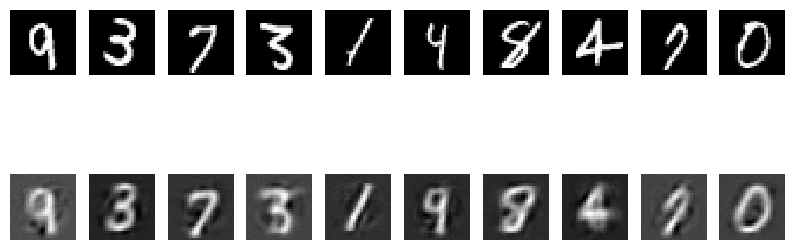

Number of Epochs = 20
Train Loss:  1683.2235
Test Loss:  1719.612


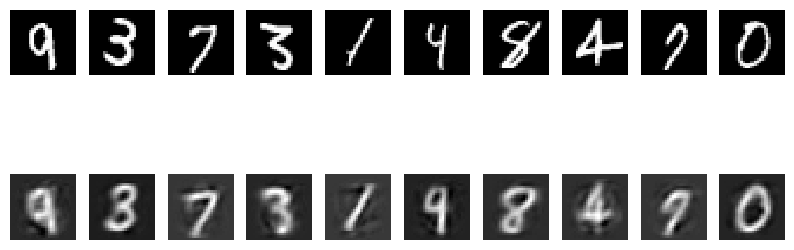

Number of Epochs = 50
Train Loss:  1187.5533
Test Loss:  1201.5715


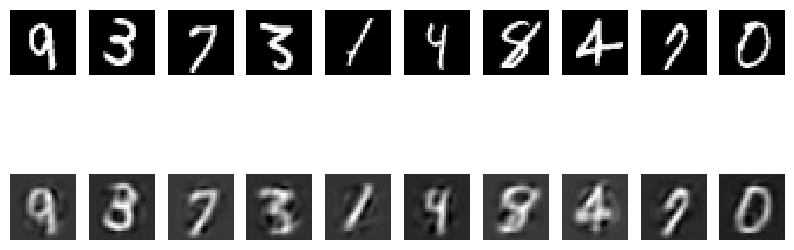

In [5]:
experimental_tasks1 = []
settings = [(5, 0.0001), (20, 0.0001), (50, 0.0001)]
#train_data, test_data, m = get_mnist_data()

for (num_epochs, l2_reg) in settings:

    model = AUTOENCODER_300_150_300(l2_reg=0)

    init = tf.global_variables_initializer()

    #Train
    train_loss, test_loss = [], []
    batch_size = 200
    with tf.Session()   as sess:
        init.run()
        train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
        test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
        print("Number of Epochs = " + str(num_epochs))
        for epoch in range(num_epochs):
            print("Epoch: " + str(epoch) + "/" + str(num_epochs), end="\r")
            n_batches = m//batch_size
            for batch in range(n_batches):
                X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
                sess.run(model.training_op, feed_dict={model.X: X_batch})
            train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
            test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

        reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

    experimental_tasks1.append(((num_epochs, l2_reg), train_loss, test_loss))

    print("Train Loss: ", train_loss[-1])
    print("Test Loss: ", test_loss[-1])
    plot_reconstructions(test_data[0: 10], reconstructions)

## 784-150-784

In [ ]:
experimental_tasks2 = []
settings = [(5, 0.0001), (20, 0.0001), (50, 0.0001)]
#train_data, test_data, m = get_mnist_data()

for (num_epochs, l2_reg) in settings:

    model = AUTOENCODER_150()

    init = tf.global_variables_initializer()

    #Train
    train_loss, test_loss = [], []
    batch_size = 200
    with tf.Session()   as sess:
        init.run()
        train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
        test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
        print("Number of Epochs = " + str(num_epochs))
        for epoch in range(num_epochs):
            print("Epoch: " + str(epoch) + "/" + str(num_epochs), end="\r")
            n_batches = m//batch_size
            for batch in range(n_batches):
                X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
                sess.run(model.training_op, feed_dict={model.X: X_batch})
            train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
            test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

        reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

    experimental_tasks2.append(((num_epochs, l2_reg), train_loss, test_loss))

    print("Train Loss: ", train_loss[-1])
    print("Test Loss: ", test_loss[-1])
    plot_reconstructions(test_data[0: 10], reconstructions)

## 784-50-784

In [ ]:
experimental_tasks3 = []
settings = [(5, 0.0001), (20, 0.0001), (50, 0.0001)]
#train_data, test_data, m = get_mnist_data()

for (num_epochs, l2_reg) in settings:

    model = AUTOENCODER_50()

    init = tf.global_variables_initializer()

    #Train
    train_loss, test_loss = [], []
    batch_size = 2000
    with tf.Session()   as sess:
        init.run()
        train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
        test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))
        print("Number of Epochs = " + str(num_epochs))
        for epoch in range(num_epochs):
            print("Epoch: " + str(epoch) + "/" + str(num_epochs), end="\r")
            n_batches = m//batch_size
            for batch in range(n_batches):
                X_batch = train_data[batch*batch_size: (batch + 1)*batch_size]
                sess.run(model.training_op, feed_dict={model.X: X_batch})
            train_loss.append(model.loss.eval(session=sess, feed_dict={model.X: train_data}))
            test_loss.append(model.loss.eval(session=sess, feed_dict={model.X: test_data}))

        reconstructions = model.outputs.eval(feed_dict={model.X: test_data[0: 10]})

    experimental_tasks3.append(((num_epochs, l2_reg), train_loss, test_loss))

    print("Train Loss: ", train_loss[-1])
    print("Test Loss: ", test_loss[-1])
    plot_reconstructions(test_data[0: 10], reconstructions)

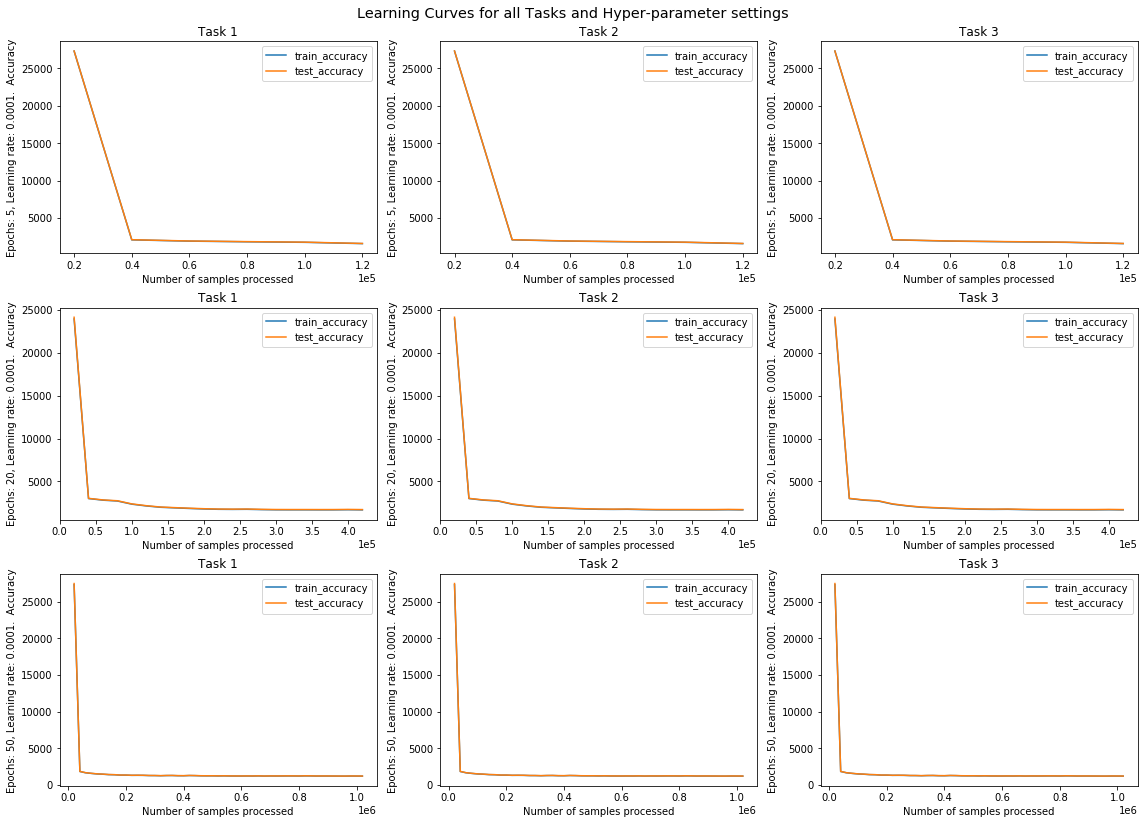

In [6]:
plot_learning_curves([experimental_tasks1, experimental_tasks1, experimental_tasks1])
#print(experimental_tasks2)